In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import pickle
import sklearn
import statsmodels.api as sm 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
!pip install imblearn
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import keras 
from keras.api.models import Sequential
from keras.api.layers import Dense
from keras.api.callbacks import EarlyStopping

In [5]:
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.size'] = 14

In [6]:
file_csv = "D:/du lieu o cu/Statistics and Machine Learning Course/data/data/Customer_Churn_01.csv"
df = pd.read_csv(file_csv)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [8]:
value_counts = df['Churn'].value_counts()
print(value_counts)

Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [9]:
df = df.drop(['customerID'], axis = 1)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
# Check null
null_values = df.isnull().sum()
print(null_values)

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [10]:
df = df.dropna(subset=['TotalCharges'])

Label Encoder

In [11]:
le = LabelEncoder()

for column in df.select_dtypes(include=['object']).columns:
    df[column] = le.fit_transform(df[column])

print(df.head(2))

   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 2            0            0                0         1   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                 1              2           29.85         29.85      0  
1                 0              3           56.95       1889.50      0  


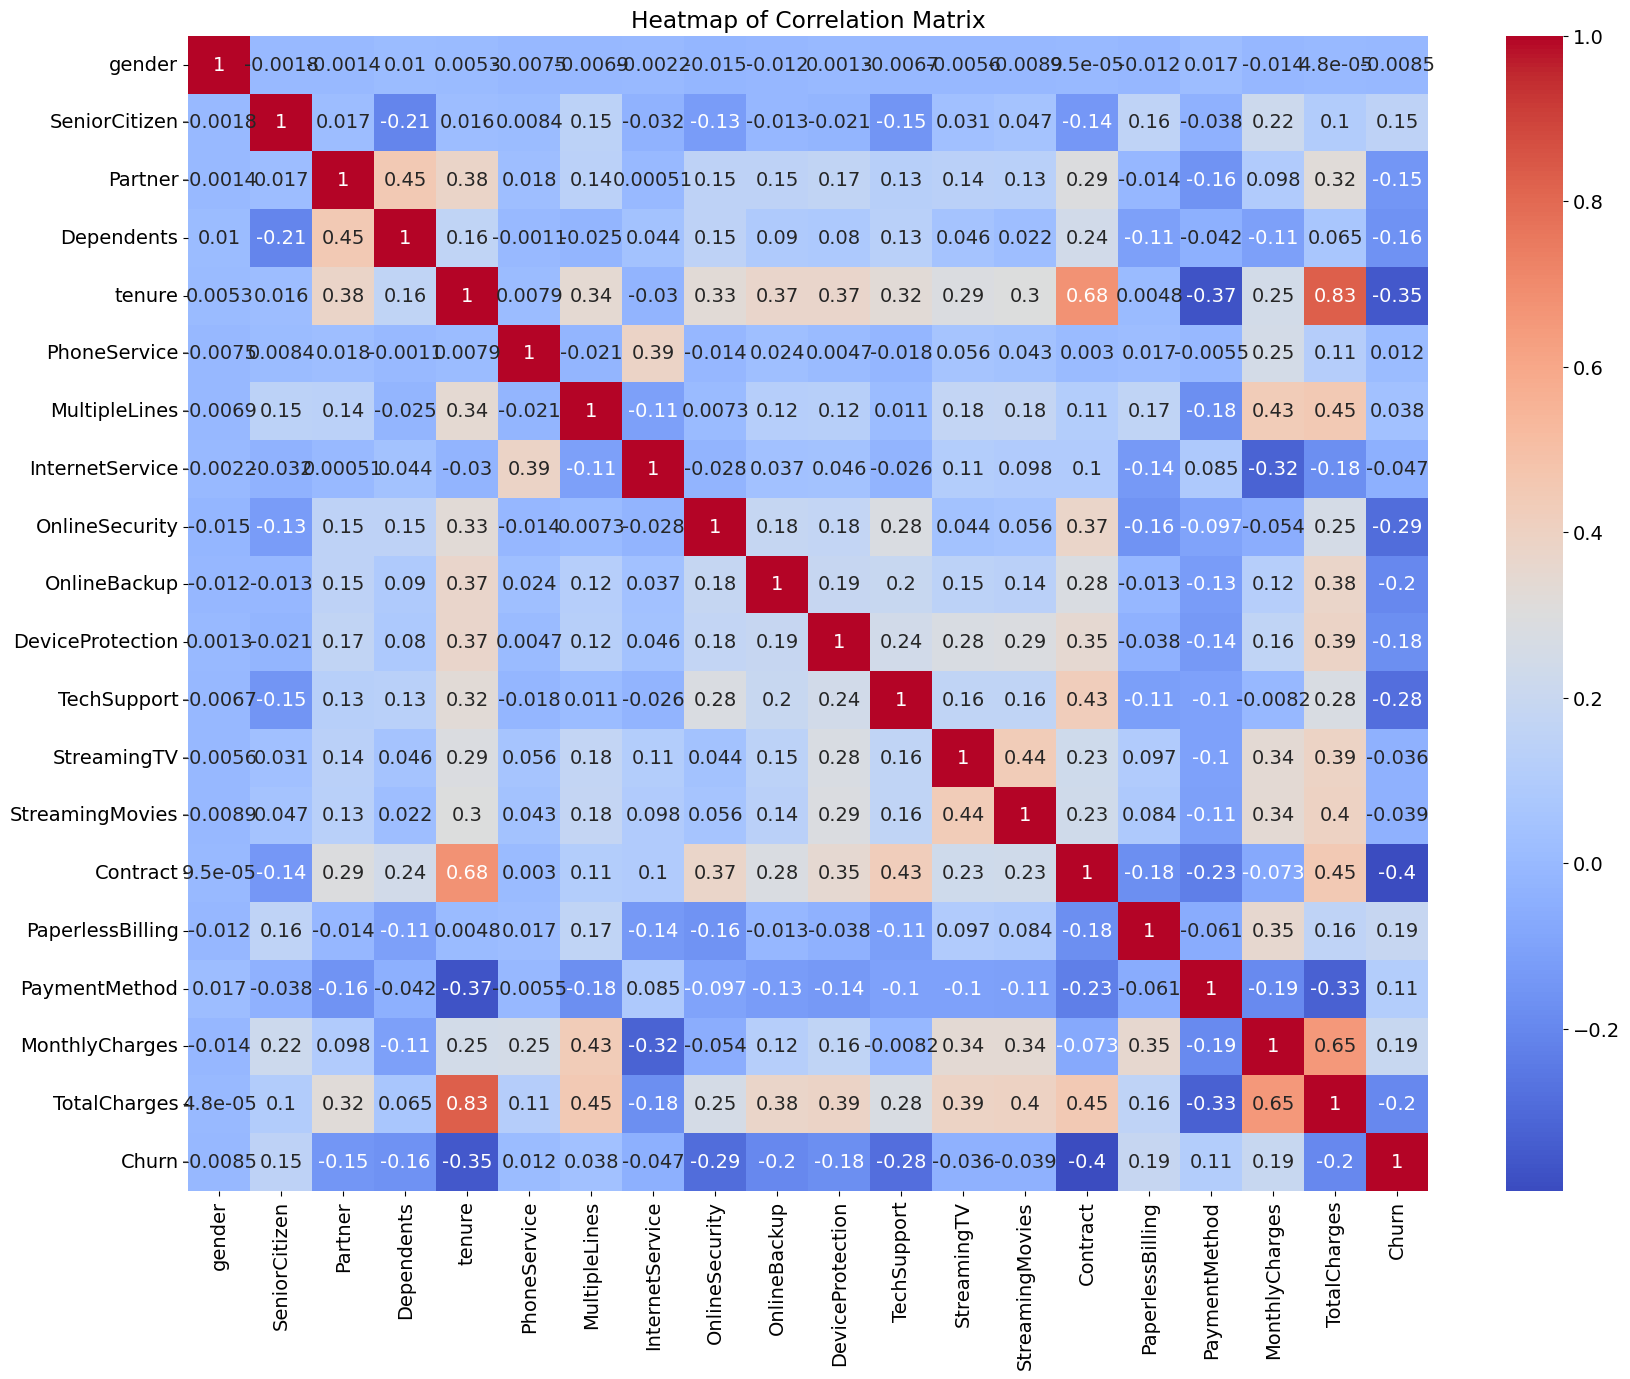

             Feature        VIF
0              const  34.800309
1             gender   1.001876
2      SeniorCitizen   1.149648
3            Partner   1.461171
4         Dependents   1.379721
5             tenure   7.493654
6       PhoneService   1.622695
7      MultipleLines   1.395898
8    InternetService   1.824359
9     OnlineSecurity   1.268758
10      OnlineBackup   1.219068
11  DeviceProtection   1.297942
12       TechSupport   1.321878
13       StreamingTV   1.446947
14   StreamingMovies   1.447896
15          Contract   2.493335
16  PaperlessBilling   1.202566
17     PaymentMethod   1.186112
18    MonthlyCharges   4.967861
19      TotalCharges  10.618697


In [12]:
# Vẽ biểu đồ heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()

# Tính VIF (Variance Inflation Factor)
X = df.drop(columns=['Churn']) 

import statsmodels.api as sm
X = sm.add_constant(X)  

vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Hiển thị kết quả VIF
print(vif_data)

In [13]:
df = df.drop('TotalCharges', axis = 'columns')

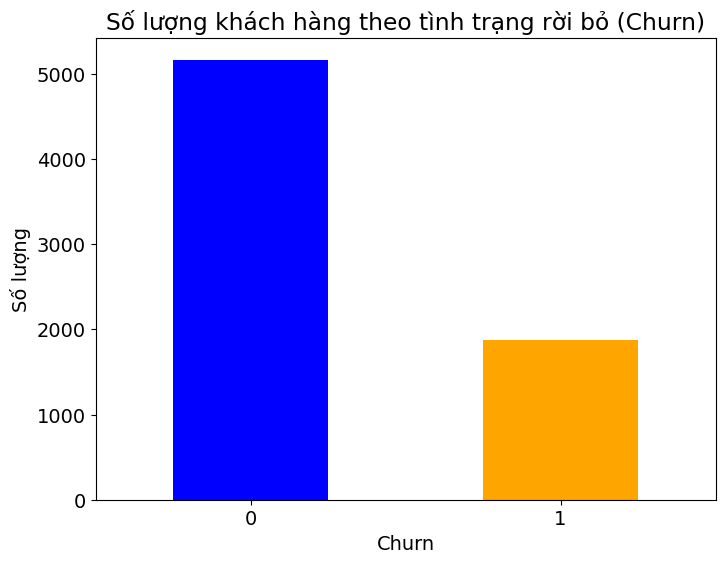

In [14]:
# Đếm số lượng từng giá trị trong cột "Churn"
churn_counts = df['Churn'].value_counts()

# Vẽ biểu đồ cột
plt.figure(figsize=(8, 6))
churn_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Số lượng khách hàng theo tình trạng rời bỏ (Churn)')
plt.xlabel('Churn')
plt.ylabel('Số lượng')
plt.xticks(rotation=0)
plt.show()

In [15]:
# Shuffle toàn bộ DataFrame
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [16]:
X = df.drop('Churn', axis = 'columns')
y = df['Churn']

In [17]:
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN

smote = SMOTEENN(random_state=42)

# Apply SMOTE to balance the classes
X_res, y_res = smote.fit_resample(X, y)

# Check the new class distribution
print("Class distribution after SMOTE:", y_res.value_counts())

Class distribution after SMOTE: Churn
1    3956
0    2776
Name: count, dtype: int64


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [19]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Chuyển đổi dữ liệu huấn luyện và kiểm tra sang định dạng numpy để sử dụng trong mô hình
inputs_scaled = np.array(X_train_scaled)
outputs = np.array(y_train).reshape(-1, 1)

Self_building ANN

In [20]:
# Hyperparameters for training
epochs = 100  
learning_rate = 0.001  
# batch_size = 32

In [21]:

# Define the neural network model
class SimpleNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights and biases
        self.weights_hidden_input = np.random.rand(input_size, hidden_size)
        self.weights_hidden_out = np.random.rand(hidden_size, output_size)
        self.bias_hidden = np.zeros((1, hidden_size))
        self.bias_output = np.zeros((1, output_size))

    @staticmethod
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))
    
    @staticmethod
    def sigmoid_derivative(x):
        return x * (1 - x)
    
    def forward(self, X):
        # Forward pass
        self.hidden_layer_values = np.dot(X, self.weights_hidden_input) + self.bias_hidden
        self.hidden_layer_output = self.sigmoid(self.hidden_layer_values)
        self.output_layer_values = np.dot(self.hidden_layer_output, self.weights_hidden_out) + self.bias_output
        self.output_layer_out = self.sigmoid(self.output_layer_values)
        return self.output_layer_out
    
    def backward(self, X, y, predicted):
        # Backward pass
        dS_out = predicted - y
        dW_out = np.dot(self.hidden_layer_output.T, dS_out)
        db_out = np.sum(dS_out, axis=0, keepdims=True)
        dS_hidden = np.dot(dS_out, self.weights_hidden_out.T) * self.sigmoid_derivative(self.hidden_layer_output)
        dW_hidden = np.dot(X.T, dS_hidden)
        db_hidden = np.sum(dS_hidden, axis=0, keepdims=True)
        return dW_hidden, dW_out, db_hidden, db_out
    
    def update(self, dW_hidden, dW_out, db_hidden, db_out):
        # Update weights and biases using gradients
        self.weights_hidden_input -= learning_rate * dW_hidden
        self.weights_hidden_out -= learning_rate * dW_out
        self.bias_hidden -= learning_rate * db_hidden
        self.bias_output -= learning_rate * db_out

    def predict(self, X):
        # Prediction function
        return self.forward(X)


In [22]:
model = SimpleNeuralNetwork(inputs_scaled.shape[1], 2, outputs.shape[1])

In [23]:
# Training loop
cost_history = []
for epoch in range(epochs):
    # Forward pass
    predicted = model.forward(inputs_scaled)

    # Calculate loss (binary cross-entropy)
    cost = -np.mean(np.sum(outputs * np.log(predicted) + (1 - outputs) * np.log(1 - predicted), axis=1))
    cost_history.append(cost)

    # Backward pass and update weights
    dW1, dW2, db1, db2 = model.backward(inputs_scaled, outputs, predicted)
    model.update(dW1, dW2, db1, db2)

    # Print loss for each epoch
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Cost: {cost}")

Epoch 0, Cost: 0.7227843795960475
Epoch 10, Cost: 0.3446006816562427
Epoch 20, Cost: 0.26747674949976125
Epoch 30, Cost: 0.24189755984920366
Epoch 40, Cost: 0.23044993553653031
Epoch 50, Cost: 0.22424127747712336
Epoch 60, Cost: 0.22074098300399622
Epoch 70, Cost: 0.21877337820220105
Epoch 80, Cost: 0.21759796126444095
Epoch 90, Cost: 0.21684099948152452


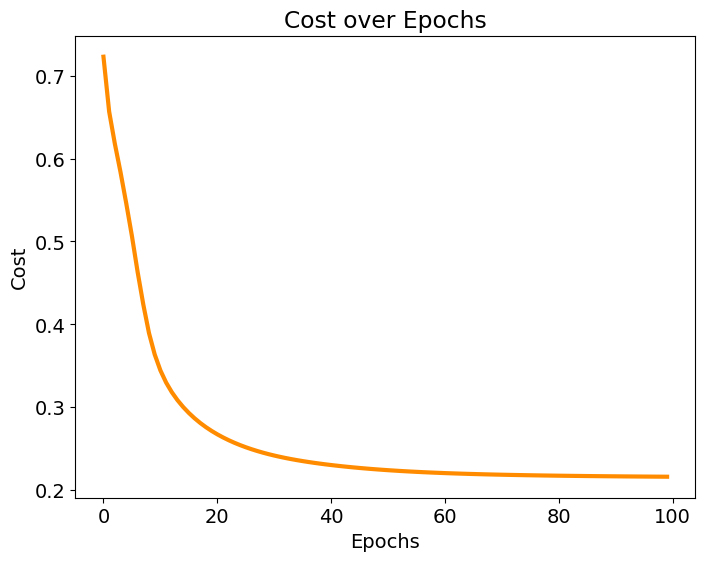

In [24]:
# Plotting cost history
plt.plot(cost_history, lw=3, color='darkorange')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost over Epochs')
plt.show()

In [25]:
# Evaluation on the training set
predicted_output = model.predict(inputs_scaled)
predicted_probs = predicted_output.reshape(-1)

# Convert predicted probabilities to binary predictions using a threshold of 0.8
predicted_labels = (predicted_probs >= 0.8).astype(int)

# Actual labels
real_values = outputs.reshape(-1)

# Calculate evaluation metrics
accuracy = accuracy_score(real_values, predicted_labels)
precision = precision_score(real_values, predicted_labels)
recall = recall_score(real_values, predicted_labels)
f1 = f1_score(real_values, predicted_labels)

# Print evaluation results
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.8986072423398329
Precision: 0.963617096432356
Recall: 0.8602964364553769
F1 Score: 0.9090303232255915


In [26]:
#vConvert testing data into numpy 
inputs_scaled_test = np.array(X_test_scaled)
outputs_test = np.array(y_test).reshape(-1, 1)

# Evaluate on test set
predicted_test_output = model.predict(X_test_scaled)
predicted_test_probs = predicted_test_output.reshape(-1)
predicted_test_labels = (predicted_test_probs >= 0.8).astype(int)

# Actual test labels
real_test_values = outputs_test.reshape(-1)

# Test set evaluation
test_accuracy = accuracy_score(real_test_values, predicted_test_labels)
test_precision = precision_score(real_test_values, predicted_test_labels)
test_recall = recall_score(real_test_values, predicted_test_labels)
test_f1 = f1_score(real_test_values, predicted_test_labels)

# Print test set evaluation
print(f'Test Accuracy: {test_accuracy}')
print(f'Test Precision: {test_precision}')
print(f'Test Recall: {test_recall}')
print(f'Test F1 Score: {test_f1}')

Test Accuracy: 0.89086859688196
Test Precision: 0.953125
Test Recall: 0.8547770700636943
Test F1 Score: 0.9012760241773002


THư viên Tensoflow

In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build the ANN model
model = Sequential()

# Input layer and first hidden layer using 'sigmoid'
model.add(Dense(units=5, activation='sigmoid', input_shape=(X_train.shape[1],)))

# Second hidden layer using 'sigmoid'
model.add(Dense(units=5, activation='sigmoid'))

# Third hidden layer using 'sigmoid'
model.add(Dense(units=5, activation='sigmoid'))

# Output layer for binary classification using 'sigmoid'
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4471 - loss: 0.7309 - val_accuracy: 0.5828 - val_loss: 0.6567
Epoch 2/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5816 - loss: 0.6444 - val_accuracy: 0.5828 - val_loss: 0.6077
Epoch 3/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7554 - loss: 0.5860 - val_accuracy: 0.8753 - val_loss: 0.5308
Epoch 4/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8904 - loss: 0.5008 - val_accuracy: 0.8812 - val_loss: 0.4465
Epoch 5/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8886 - loss: 0.4220 - val_accuracy: 0.8872 - val_loss: 0.3834
Epoch 6/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8872 - loss: 0.3652 - val_accuracy: 0.8872 - val_loss: 0.3436
Epoch 7/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8853 - loss: 0.3315 - val_accuracy: 0.8864 - val_loss: 0.3203
Epoch 8/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8867 - loss: 0.3116 - val_accuracy: 0.

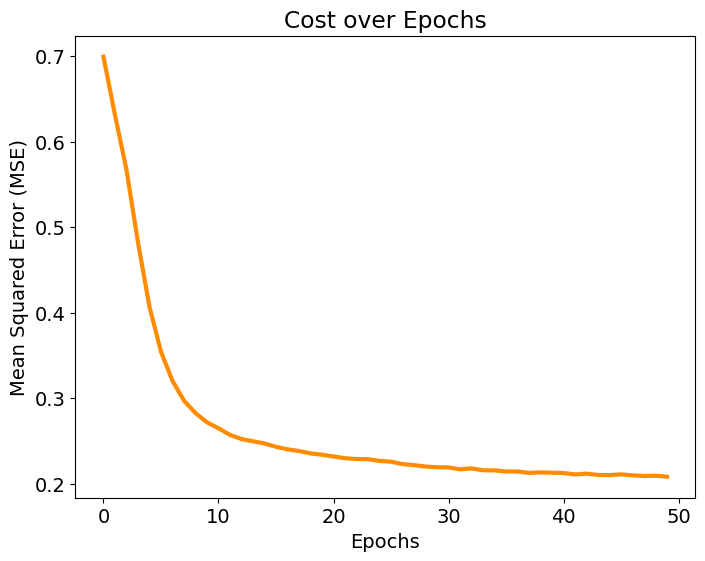

In [28]:
import matplotlib.pyplot as plt

# Plotting cost history (MSE)
plt.plot(history.history['loss'], lw=3, color='darkorange')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Cost over Epochs')
plt.show()
